## Data Visualization

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set working Directory
os.chdir("C:/Users/Shivam/Desktop/Data Science edWisor/PROJECT/python")

# Loading Dataset
df = pd.read_excel("Absenteeism_at_work_Project.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
# Droping observation in which "Absenteeism time in hours" has missing value
df.dropna(axis=0,how='any',subset=['Absenteeism time in hours'],inplace=True)
print("The shape of dataset after dropping observation is:{}".format(df.shape))
## Applying KNN Imputation 
from fancyimpute import KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

The shape of dataset after dropping observation is:(718, 21)


Using TensorFlow backend.


Imputing row 1/718 with 0 missing, elapsed time: 0.164
Imputing row 101/718 with 1 missing, elapsed time: 0.167
Imputing row 201/718 with 0 missing, elapsed time: 0.170
Imputing row 301/718 with 0 missing, elapsed time: 0.171
Imputing row 401/718 with 0 missing, elapsed time: 0.173
Imputing row 501/718 with 1 missing, elapsed time: 0.174
Imputing row 601/718 with 0 missing, elapsed time: 0.174
Imputing row 701/718 with 0 missing, elapsed time: 0.175


In [5]:
for i in df.columns:
    df[i] = df[i].round()

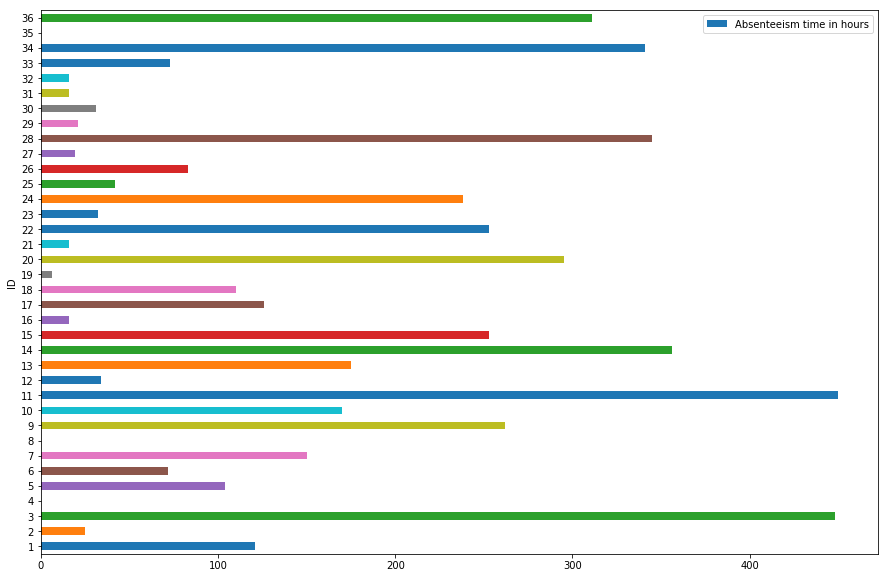

In [69]:
## Total absenteeism per Employee
df_v = df.groupby("ID")["Absenteeism time in hours"].sum()
df_v = df_v.reset_index()
#df_v["Absenteeism time in hours"] = (df_v["Absenteeism time in hours"]*100)/sum(df_v["Absenteeism time in hours"])

df_v.plot(kind="barh",x="ID",y="Absenteeism time in hours",figsize=(15,10))

### It is better if we generate a function to show a relationship among the independent variables and depent variable.


In [5]:
def relation(a,b):
    df1 = df.groupby(a)[b].sum()
    df1 = df1.reset_index()
    df1["Absenteeism time in hours"] = (df1["Absenteeism time in hours"]*100)/sum(df1["Absenteeism time in hours"])
    df1 = df1.sort_values(by=['Absenteeism time in hours'])
    print(df1)
    df1.plot(kind="barh",x= a,y= b,figsize=(15,10))


      ID  Absenteeism time in hours
34  35.0                   0.000000
3    4.0                   0.000000
7    8.0                   0.000000
18  19.0                   0.119760
20  21.0                   0.319361
15  16.0                   0.319361
31  32.0                   0.319361
30  31.0                   0.319361
26  27.0                   0.379242
28  29.0                   0.419162
1    2.0                   0.499002
29  30.0                   0.618762
22  23.0                   0.638723
11  12.0                   0.678643
24  25.0                   0.838323
5    6.0                   1.437126
32  33.0                   1.457086
25  26.0                   1.656687
4    5.0                   2.075848
17  18.0                   2.195609
0    1.0                   2.415170
16  17.0                   2.514970
6    7.0                   2.994012
9   10.0                   3.393214
12  13.0                   3.493014
23  24.0                   4.750499
21  22.0                   5

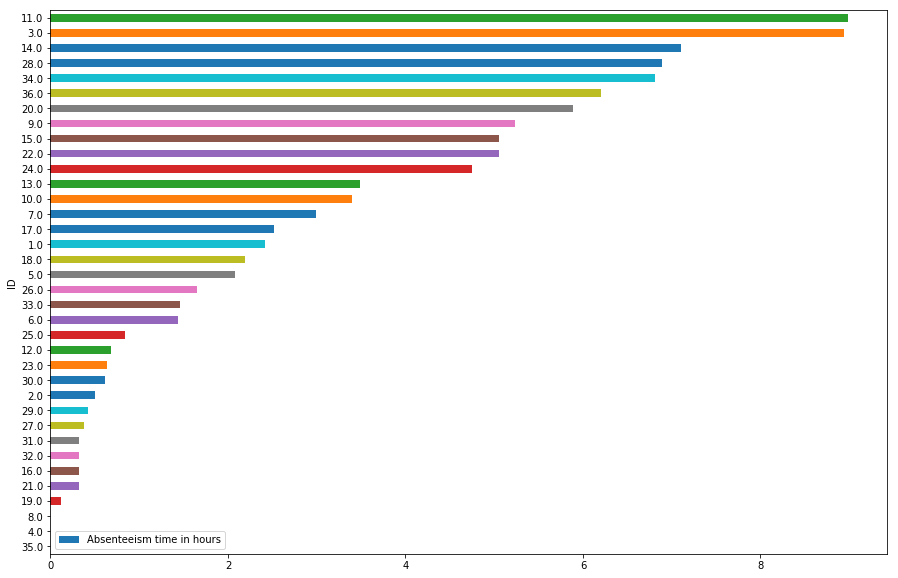

In [6]:
## Total absenteeism per employee
relation("ID","Absenteeism time in hours")

    Reason for absence  Absenteeism time in hours
16                16.0                   0.119760
3                  3.0                   0.159681
20                20.0                   0.159681
17                17.0                   0.159681
4                  4.0                   0.179641
15                15.0                   0.319361
5                  5.0                   0.379242
2                  2.0                   0.479042
24                24.0                   0.479042
8                  8.0                   0.638723
21                21.0                   0.698603
25                25.0                   2.155689
0                  0.0                   2.395210
7                  7.0                   2.994012
14                14.0                   3.173653
27                27.0                   3.193613
6                  6.0                   3.253493
9                  9.0                   3.353293
11                11.0                   3.532934


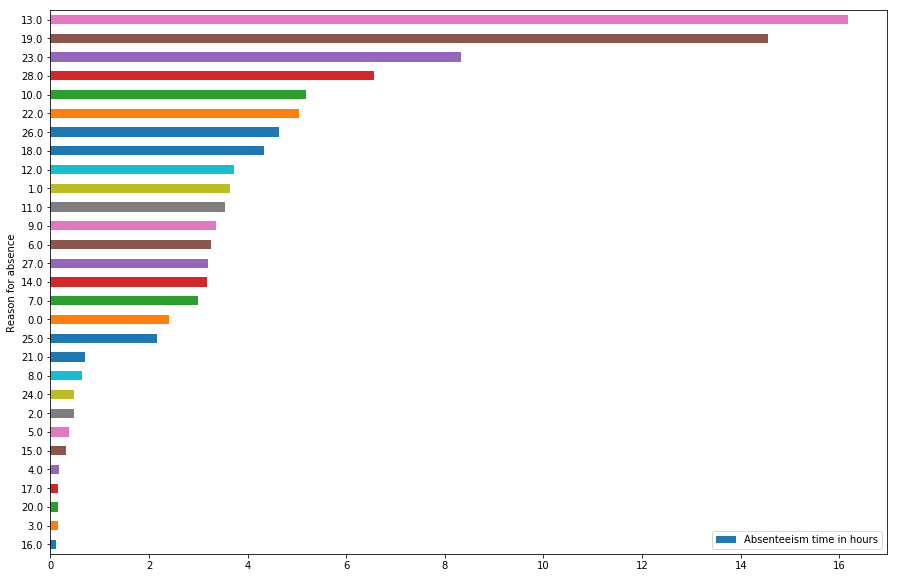

In [7]:
## Frequent reason for absenteeism
relation('Reason for absence','Absenteeism time in hours')


Top 3 categories in order of Absenteeism time are:

1. Category 13:Diseases of the musculoskeletal system and connective tissue - 16.67 % of total time.
2. Category 19:Injury, poisoning and certain other consequences of external causes - 14.55 % of total time.
3. Category 23:medical consultation - 8.32 % of total time.
4. Category 28:dental consultation - 6.56 % 0f total time.

Conclusions & possible remedies:

Musculoskeletal system disease is the major reason of absenteeism. Bad working posture & high workload are possible reasons for the high incidence of musculoskeletal disease. Company should conduct a study on the working postures of people and go for more ergonomic workplace design. Company should try to optimize workload keeping in mind occupational health of working people.
Medical consultation may be brought down by optimizing workloads.
Injury incidence may be reduced by creating proper ergonomic working setup.
Dental consultation time may be reduced by informing employees of the dental health guidelines so that they can take better care of their teeth.

    Month of absence  Absenteeism time in hours
0                0.0                   0.000000
1                1.0                   4.431138
8                8.0                   5.429142
9                9.0                   5.668663
2                2.0                   5.868263
10              10.0                   6.846307
12              12.0                   7.624750
5                5.0                   7.824351
6                6.0                   8.043912
11              11.0                   9.241517
4                4.0                   9.620758
7                7.0                  14.451098
3                3.0                  14.950100


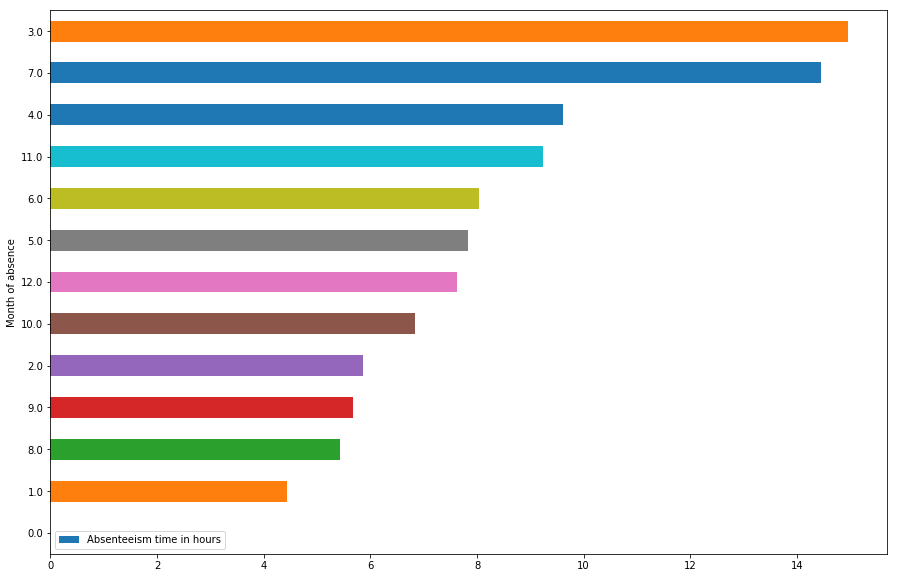

In [8]:
## Employees absenteeism in different month
relation('Month of absence','Absenteeism time in hours')


Top 3 months in order of Absenteeism time are:

1. Month 3:March - 14.95 % of total time
2. Month 7:July - 14.45 % of total time
3. Month 4:April - 9.62 % of total time

   Day of the week  Absenteeism time in hours
3              5.0                  11.037924
4              6.0                  13.792415
2              4.0                  21.776447
1              3.0                  26.067864
0              2.0                  27.325349


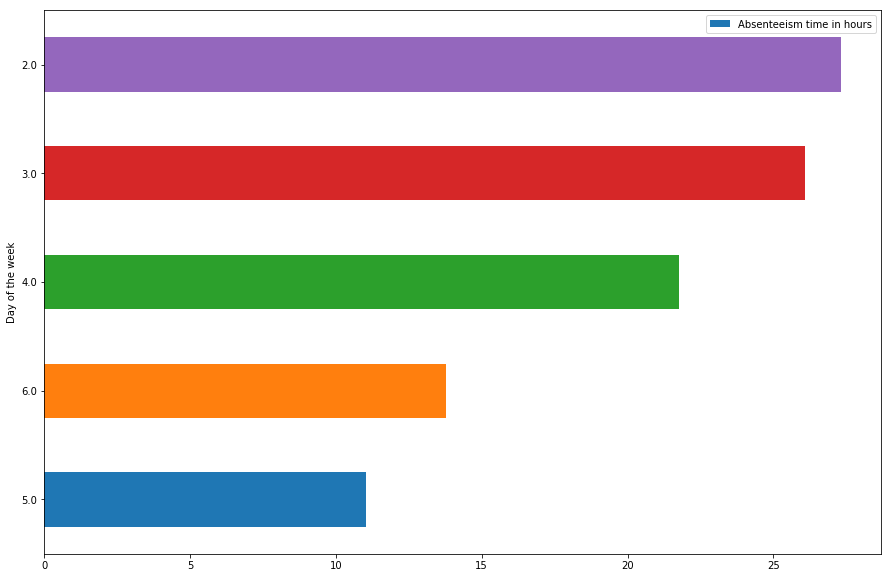

In [9]:
## Total absenteeism in different days of the week
relation('Day of the week','Absenteeism time in hours')

   Education  Absenteeism time in hours
3        4.0                   0.419162
1        2.0                   5.708583
2        3.0                   8.303393
0        1.0                  85.568862


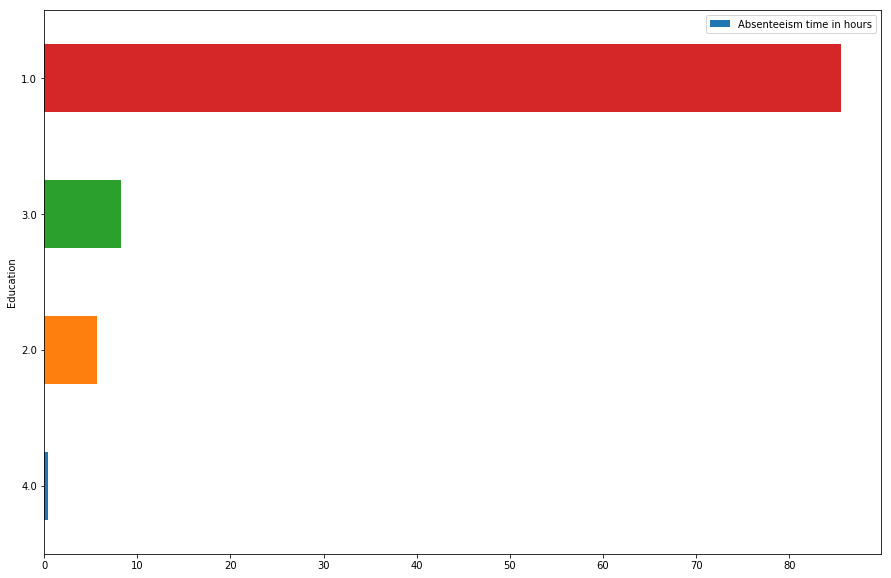

In [10]:
### Relation between education and Absenteeism time
relation('Education','Absenteeism time in hours')

   Social drinker  Absenteeism time in hours
0             0.0                  37.305389
1             1.0                  62.694611


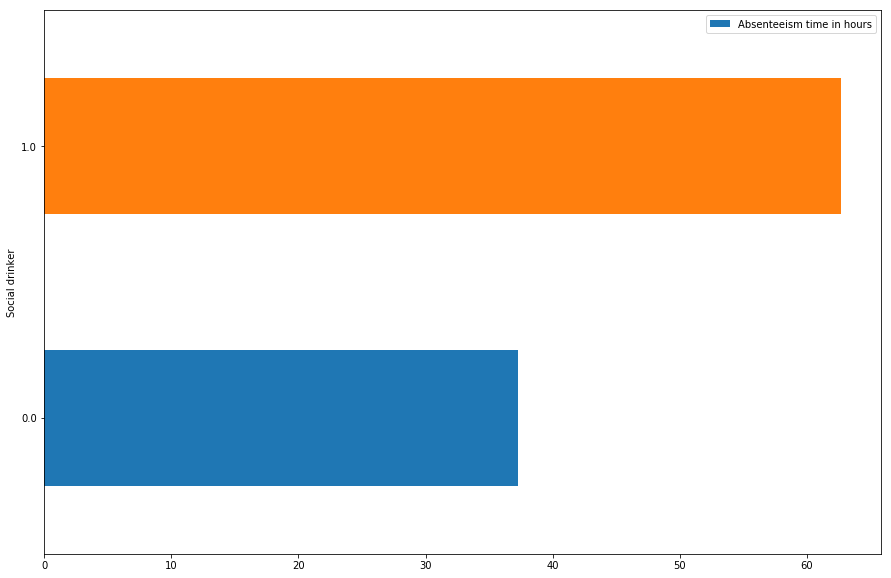

In [11]:
## Social drinker on absenteesim time
relation('Social drinker','Absenteeism time in hours')

Social drinkers are more absent from their work

   Social smoker  Absenteeism time in hours
1            1.0                   9.241517
0            0.0                  90.758483


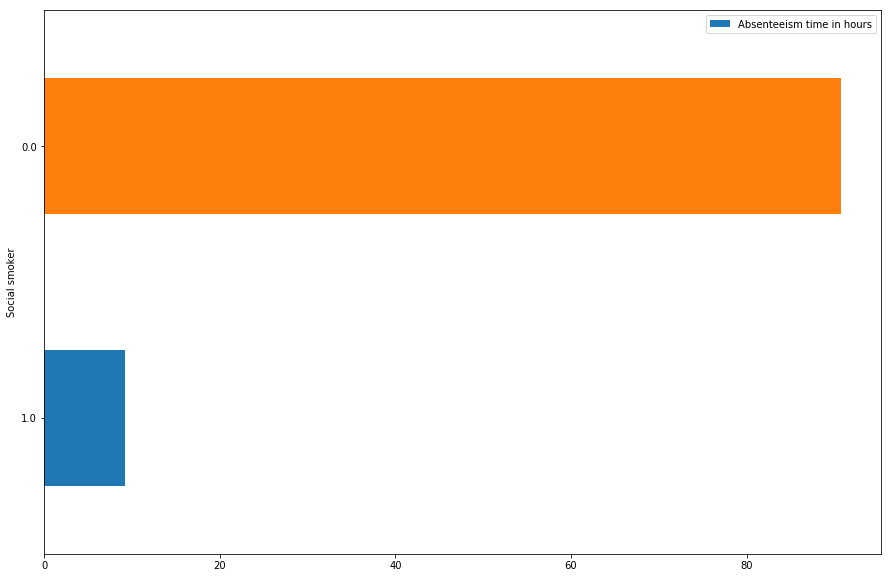

In [12]:
## Social smoker and absenteeism time
relation("Social smoker","Absenteeism time in hours")

Non smokers are more frequently absent from work.

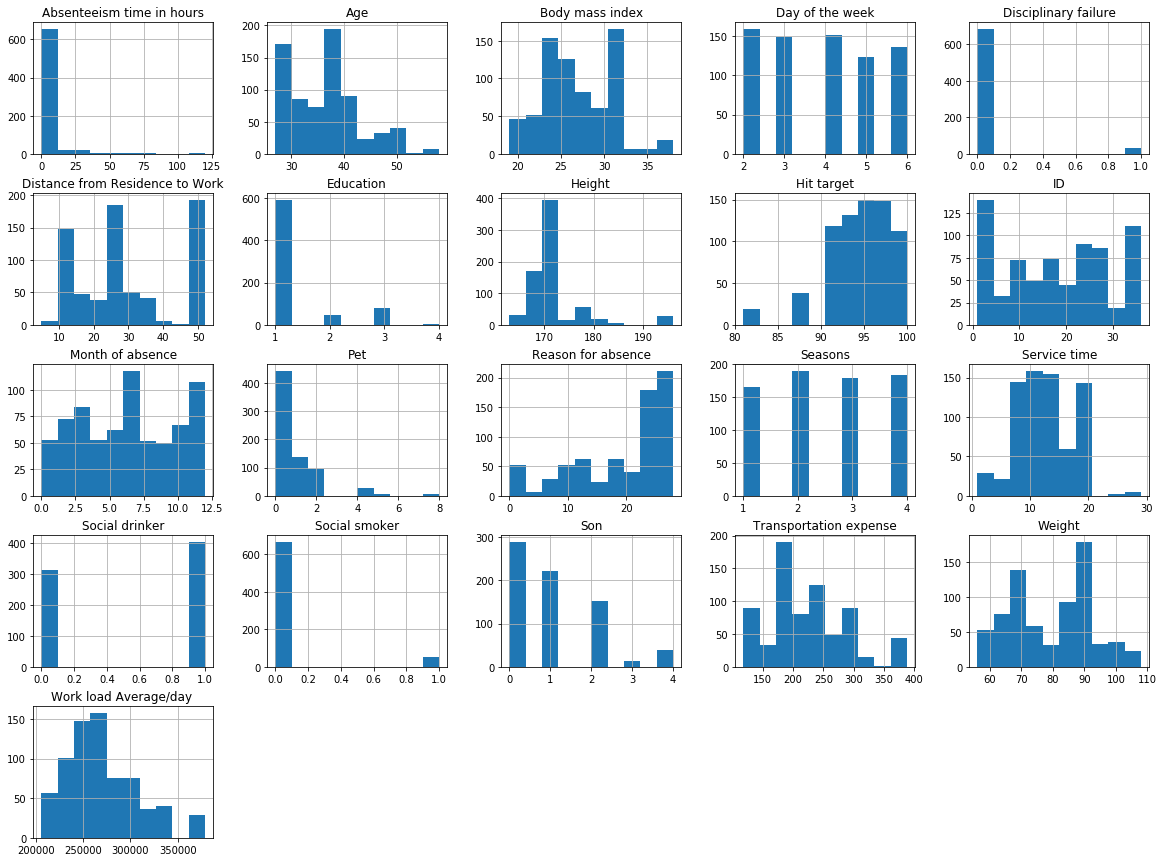

In [19]:
## Histogram plot 
df.hist(figsize=(20,15))
plt.show()

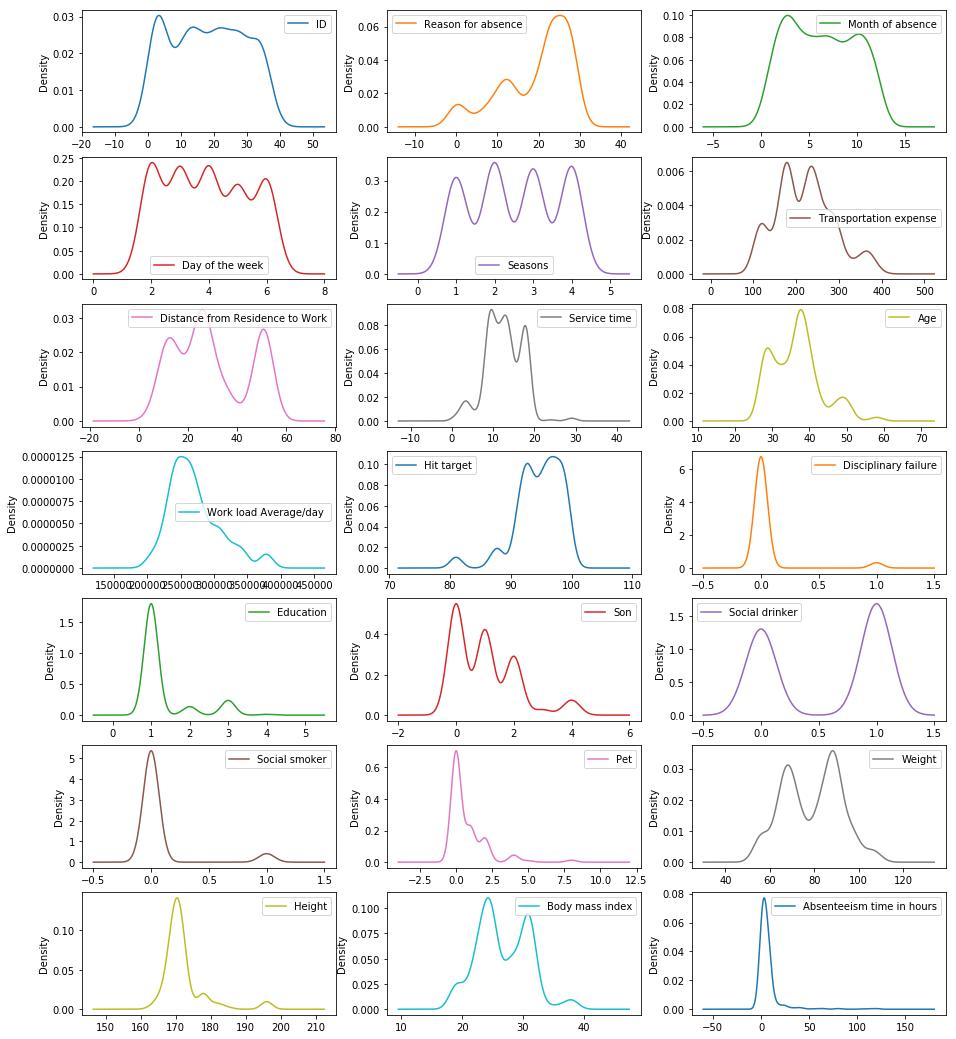

In [39]:
df.plot(kind='density', subplots=True, layout=(8,3), sharex=False)
plt.subplots_adjust(left=0, bottom=1, right=2, top= 5,wspace=0.2, hspace=0.2)
plt.show()

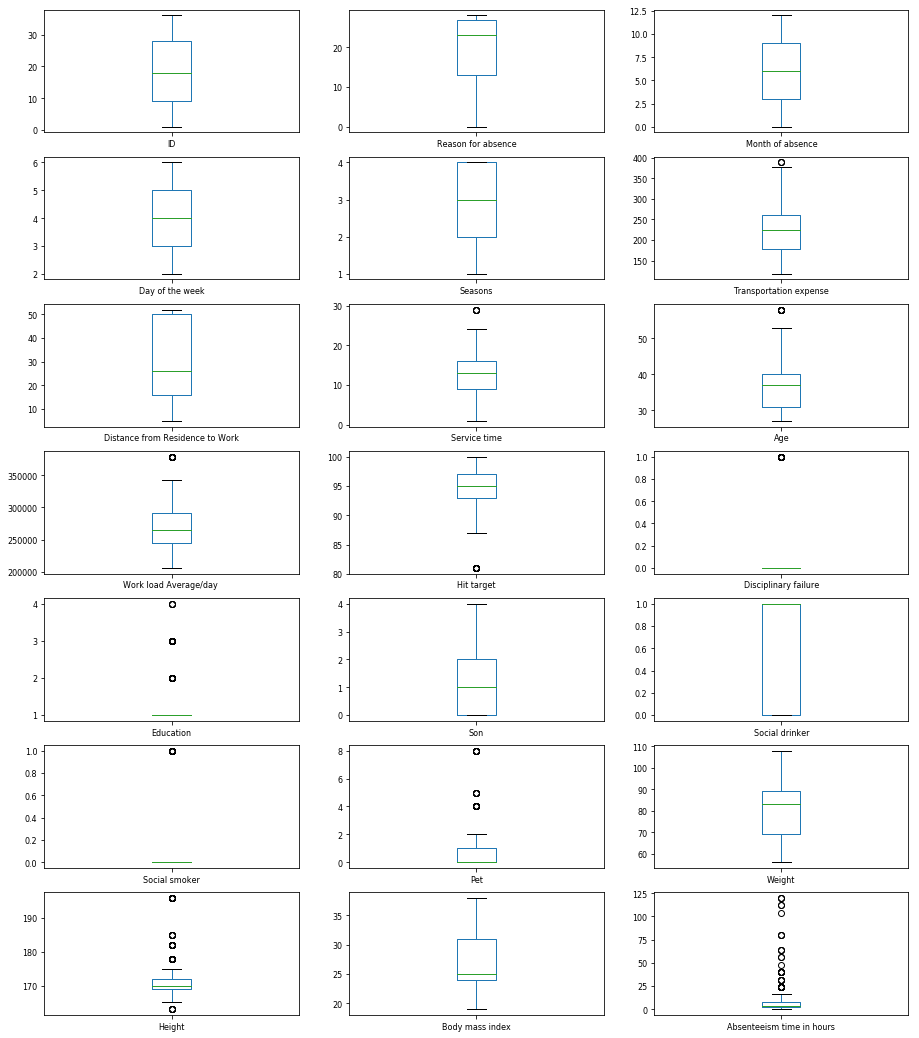

In [41]:
df.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0, bottom=1, right=2, top= 5,wspace=0.2, hspace=0.2)
plt.show()